# Author: Alejandro C. Parra Garcia

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# 1. Import Data

In [2]:
#The original txt file has been modified, to delete the consecutives duplicates ‘\t’
path="https://github.com/The-Katz-School-at-Yeshiva-University/Neural.Networks.-.Deep.Learn/blob/main/Mini%20Project%201/data/seeds_dataset.txt?raw=true"

In [3]:
#Import the data and create the Columns Names
df = pd.read_csv(path, sep="\t", header=None)
df.columns = ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove','class']

In [4]:
# Let’s see the imported data:
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
#Search for nulls
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
class                      0
dtype: int64

## We can see that there are no Nulls values

# 1.2. Treat the data

In [6]:
df.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


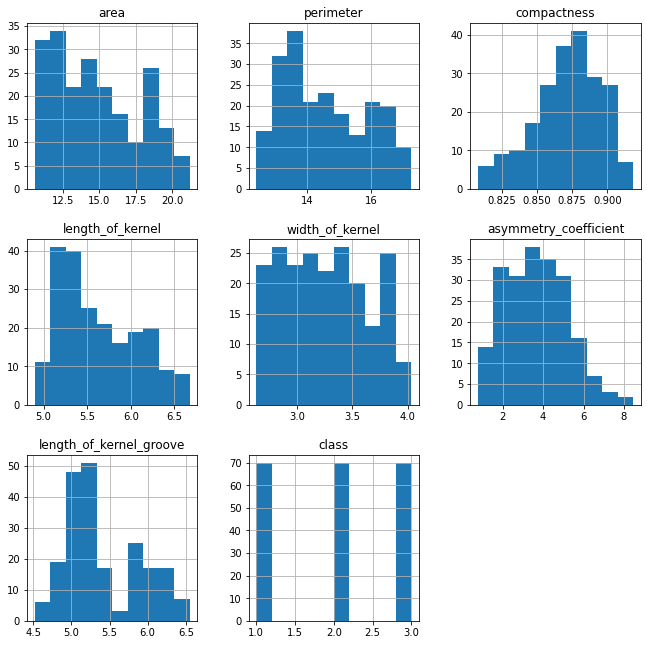

In [7]:
df.hist(figsize=[11,11])
plt.show()

### Now, we normalize the data. Using the Min max Scaler, from sklearn

In [8]:
minmax=MinMaxScaler()
p_minmax=minmax.fit_transform(df[['area','perimeter','compactness','length_of_kernel',
                                               'width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']])
df_minmax = pd.DataFrame(p_minmax)
df['area']=df_minmax[0]
df['perimeter']=df_minmax[1]
df['compactness']=df_minmax[2]
df['length_of_kernel']=df_minmax[3]
df['width_of_kernel']=df_minmax[4]
df['asymmetry_coefficient']=df_minmax[5]
df['length_of_kernel_groove']=df_minmax[6]

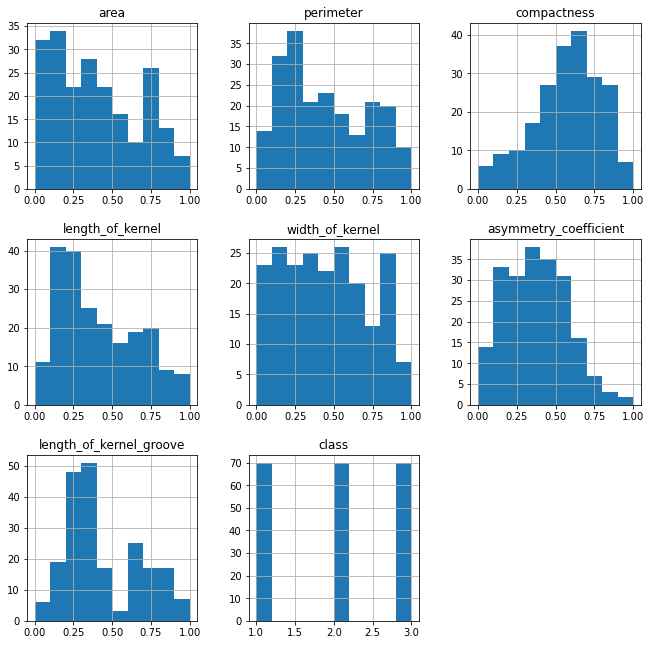

In [9]:
df.hist(figsize=[11,11])
plt.show()

# 1.3. Save as CSV file

In [10]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

compression_opts = dict(method='zip',
                        archive_name='seeds_dataset.csv')  
df.to_csv('out.zip',sep=';', index=False,
          compression=compression_opts) 

# 2 Create the model functions

## These functions are the ones from the Problem Set #3, copied and pasted. The problem 11, has been split into the Forward Propagation and the Backpropagation to make it easier to operate.

In [11]:
#Import the libraries
import numpy as np
from random import seed
from random import random
import math

min=-0.5
max=0.5
seed(1) # Seed For the Random Generator for the Weights

s=1 # Seed For the Split Data

In [12]:
def print_mat(text="",mat=[[]]):
    print(text,end="")
    for x in mat:
        print("\t",x)
    print("")

In [13]:
#Problem 0, Initialize the Weights at random 
def initialize_Weights (x_range,y_range): 
    # Return: dimensions[(x_range) x (y_range)]
    
    mat=[]
    for x in range(x_range):
        vec=[]
        if(x==(x_range-1)):#Last Row
            ran=randomNumber()
            for y in range(y_range):
                vec.append(ran)
        else:#Rest of rowa
            for y in range(y_range):
                vec.append(randomNumber())
        mat.append(vec)
    return mat

#Create nonzero random number between Max and Min
def randomNumber():
    value = min + (random() * (max - min))
    if(value==0):
        value=randomNumber()
    return value

In [14]:
#Problem 1, append to vector a number 1
def append_1(v):
    #v: dimensions: _x1
    
    v_app=[[0 for x in range(len(v[0]))] for y in range(len(v))]#Create the response matrix
    
    for xx, row in enumerate(v):
        for yy, item in enumerate(row):
            v_app[xx][yy]=item
    
    v_app.append([1])
    return v_app

In [15]:
#Problem 2, multiply f_inut and w_input
def multiply_weights (f_input,w_input):
    # ℎ𝑟𝑎𝑤 = 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓)𝑇 * 𝑊𝑖𝑛𝑝𝑢𝑡
    # f_input: dimensions[(a-1) x 1]
    # w_input: dimensions[(a) x (b)]
    # 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓): dimensions[(a) x 1]
    # 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓)𝑇:dimensions[1 x (a)]
    
    # ℎ𝑟𝑎𝑤 = 𝑎𝑝𝑝𝑒𝑛𝑑(𝑓)𝑇 * 𝑊𝑖𝑛𝑝𝑢𝑡
    # ℎ𝑟𝑎𝑤: dimensions[1 x (a) * (a) x (b)]
    # ℎ𝑟𝑎𝑤: dimensions[1 x (b)]
    
    app_f_input=append_1(f_input)# Append 1
    trans_app_f_input=transpose_mat(app_f_input)# Transpose
    result = muliply_mat(trans_app_f_input,w_input)# Multiply
    return result

#transpose a matrix
def transpose_mat(vec):
    # t_vec = (vec)T
    # vec: dimensions[(x) x (y)]
    # (vec)T: dimensions[(y) x (x)]
    
    # t_vec = (vec)T
    # t_vec: dimensions[(y) x (x)]
    
    t_vec=[]
    for y in range(len(vec[0])):
        row=[]
        for x in range(len(vec)):
            row.append(vec[x][y])
        t_vec.append(row)
    return t_vec

#multiply matrix
def muliply_mat(m1,m2):
    # result = m1 * m2
    # m1: dimensions[(a) x (b)]
    # m2: dimensions[(b) x (c)]
    # m1 * m2: dimensions[(a) x (c)]
    
    # result = m1 * m2
    # result: dimensions[(a) x (c)]
    
    #Create a Matrix of 0 with the dimension of the Rowa of "m1" and columns of "m2"
    result=[]
    for x in range(len(m1)):
        row=[]
        for y in range(len(m2[0])):
            row.append(0)
        result.append(row)
    #Multiply
    for i in range(len(m1)):
        for j in range(len(m2[0])):
            for k in range(len(m2)):
                multiply=m1[i][k] * m2[k][j]
                result[i][j] += multiply
    return result

In [16]:
#Problem 3, apply sigmoid function
def apply_sigmoid(h_raw):
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(ℎ𝑟𝑎𝑤)
    # ℎ𝑟𝑎𝑤: dimensions[(a) x (b)]
    # 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(ℎ𝑟𝑎𝑤): dimensions[(a) x (b)]
    
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑 = 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(ℎ𝑟𝑎𝑤)
    # ℎ𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑒𝑑: dimensions[(a) x (b)]
    
    h_activated=[[0 for x in range(len(h_raw[0]))] for y in range(len(h_raw))]#Create the response matrix
    for x, row in enumerate(h_raw):
        for y, item in enumerate(row):
            h_activated[x][y]=sigmoid(item)
    return h_activated
            
def sigmoid(item):
    return (1/(1+(math.exp( 0-item ))))

In [17]:
#Problem 4, calculate the Error
def calculate_E(o_activated,t):
    #E = 0.5 * (o_activated-t)T * (o_activated-t)
    
    diff=subtraction(o_activated,t)
    t_diff=transpose_mat(diff)
    
    e=muliply_mat(t_diff,diff)
    return 0.5*e[0][0]
    
def subtraction(elem1,elem2):
    # result = elem1 - elem2
    # elem1: dimensions[(a) x (b)]
    # elem2: dimensions[(a) x (b)]
    # elem1 - elem2: dimensions[(a) x (b)]
    
    # result = elem1 - elem2
    # result: dimensions[(a) x (b)]
    res=[[0 for x in range(len(elem1[0]))] for y in range(len(elem1))] #Create the response matrix
    for x, row in enumerate(elem1):
        for y, item in enumerate(row):
            res[x][y]=item-elem2[x][y]
    return res

In [18]:
#Problem 5, calculate the 𝑔(𝐸, 𝑊𝑗𝑘)
def g_E_Wjk_fun(o_activated,t,h_activated):
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑇ℎ𝑖𝑑𝑗
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = {[ (o_activated-t)**o_activated**(1-o_activated) ] * h_activated T} T     (**: Indicates multiply elem by elem)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # h_activated: dimensions[(b) x 1]    [7 x 1]
    
    # (o_activated-t): dimensions[(a) x 1] [3 x 1]
    o_activated_minus_t = subtraction(o_activated,t)
    #print_mat("o_activated_t:",o_activated_minus_t)
    
    # (1-o_activated): dimensions[(a) x 1] [3 x 1]
    one_minus_o_activated = one_minus_mat(o_activated)
    #print_mat("one_minus_o_activated:",one_minus_o_activated)
    
    # (o_activated-t)**o_activated: dimensions[(a) x 1] [3 x 1]
    o_activated_minus_t_xx_o_activated=muliply_mat_elem_by_elem(o_activated_minus_t,o_activated)
    #print_mat("o_activated_minus_t_xx_o_activated:",o_activated_minus_t_xx_o_activated)
    
    # (o_activated-t)**o_activated**(1-o_activated): dimensions[(a) x 1] [3 x 1]
    o_act_m_t_xx_o_act_xx_1_m_o_act=muliply_mat_elem_by_elem(o_activated_minus_t_xx_o_activated,one_minus_o_activated)
    #print_mat("o_act_m_t_xx_o_act_xx_1_m_o_act:",o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # h_activated T: dimensions[1 x (b)]    [1 x 7]
    trans_h_activated=transpose_mat(h_activated)
    #print_mat("trans_h_activated:",trans_h_activated)
    
    # [(o_activated-t)**o_activated**(1-o_activated)]*h_activated T: dimensions[(a) x (b)]    [3 x 7]
    res=muliply_mat(o_act_m_t_xx_o_act_xx_1_m_o_act,trans_h_activated)
    #print_mat("𝑔(𝐸,𝑊𝑗𝑘):",res)
    
    # 𝑔(𝐸,𝑊𝑗𝑘) = (𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑇ℎ𝑖𝑑𝑗
    # 𝑔(𝐸,𝑊𝑗𝑘) = {[ (o_activated-t)**o_activated**(1-o_activated) ] * h_activated T} T 
    # 𝑔(𝐸,𝑊𝑗𝑘): dimensions[(b) x (a)] [7 x 3]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights
    
def one_minus_mat(mat):
    # result = 1 - mat
        # res ij = 1 - mat ij (0<i<a,0<j<b)
    # mat: dimensions[(a) x (b)]
    # 1 - mat: dimensions[(a) x (b)]
    
    # result = 1 - mat
    # result: dimensions[(a) x (b)]
    res=[[0 for x in range(len(mat[0]))] for y in range(len(mat))] #Create the response matrix
    for x, row in enumerate(mat):
        for y, item in enumerate(row):
            res[x][y]=1-item
    return res

def muliply_mat_elem_by_elem(mat1,mat2):
    # result = mat1 * mat2
        # res ij = mat1 ij * mat2 ij (0<i<a,0<j<b)
    # mat1: dimensions[(a) x (b)]
    # mat2: dimensions[(a) x (b)]
    # mat1 * mat2: dimensions[(a) x (b)]
    
    # result = mat1 * mat2
    # result: dimensions[(a) x (b)]
    
    res=[[0 for x in range(len(mat1[0]))] for y in range(len(mat1))] #Create the response matrix
    for x, row in enumerate(mat1):
        for y, item in enumerate(row):
            res[x][y]=mat1[x][y]*mat2[x][y]
    return res
    

In [19]:
#Problem 6, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂)
def g_E_biasO_fun(o_activated,t):
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)]
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(o_activated-t)*o_activated*(1-o_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(o_activated-t)**o_activated**(1-o_activated)]      (**: Indicates multiply elem by elem)
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)**o_activated**(1-o_activated)] (Multiply by a row of ones in order to add)
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # ones: dimensions[1 x (a)]           [1 x 3]   (Form by 1's) (1 ... 1)
    
    # [(o_activated-t)**o_activated**(1-o_activated)]: dimensions[(a) x 1] [3 x 1] (Same as Problem 5)
    o_activated_minus_t = subtraction(o_activated,t)
    one_minus_o_activated = one_minus_mat(o_activated)
    o_activated_minus_t_xx_o_activated=muliply_mat_elem_by_elem(o_activated_minus_t,o_activated)
    o_act_m_t_xx_o_act_xx_1_m_o_act=muliply_mat_elem_by_elem(o_activated_minus_t_xx_o_activated,one_minus_o_activated)
    #print_mat("o_act_m_t_xx_o_act_xx_1_m_o_act:",o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 3]
    ones=[[1 for x in range(len(o_act_m_t_xx_o_act_xx_1_m_o_act))]]
    #print_mat("ones:",ones)
    
    # ones * [(o_activated-t)**o_activated**(1-o_activated)] : dimensions[1 x 1]
    res=muliply_mat(ones,o_act_m_t_xx_o_act_xx_1_m_o_act)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂):",res)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ones * [(o_activated-t)**o_activated**(1-o_activated)] 
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂): dimensions[1 x 1]
    return res

In [20]:
#Problem 7, calculate the 𝑔(𝐸,𝑤𝑖𝑗)
def g_E_wij_fun(o_activated,t,w_hidden,h_activated,f_input):
    #print_mat("o_activated:",o_activated)
    #print_mat("t:",t)
    #print_mat("w_hidden:",w_hidden)
    #print_mat("h_activated:",h_activated)
    #print_mat("f_input:",f_input)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙𝑇ℎ𝑖𝑑𝑗∙(1−𝑇ℎ𝑖𝑑𝑗)∙𝑖𝑛𝑝𝑖
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # 𝑖𝑛𝑝𝑖 = f_input
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)*h_activated*(1-h_activated)*f_input
    # 𝑔(𝐸,𝑤𝑖𝑗) = {[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]*f_input T} T
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # f_input: dimensions[(b) x 1]    [7 x 1]
    
    # (1-h_activated): dimensions[(a) x 1] [7 x 1]
    one_minus_h_activated = one_minus_mat(h_activated)
    #print_mat("one_minus_h_activated:",one_minus_h_activated)

    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    g_E_Thidj = g_E_Thidj_fun(o_activated,t,w_hidden)
    #print_mat("𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗):",g_E_Thidj)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj_xx_h_activated = muliply_mat_elem_by_elem(g_E_Thidj,h_activated)
    #print_mat("g_E_Thidj_xx_h_activated:",g_E_Thidj_xx_h_activated)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj_xx_h_act_xx_one_minus_h_act = muliply_mat_elem_by_elem(g_E_Thidj_xx_h_activated,one_minus_h_activated)
    #print_mat("g_E_Thidj_xx_h_act_xx_one_minus_h_act:",g_E_Thidj_xx_h_act_xx_one_minus_h_act)
        
    # f_input T: dimensions[1 x (b)] [1 x 7]
    trans_f_input=transpose_mat(f_input)
    #print_mat("trans_f_input:",trans_f_input)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]*f_input T: dimensions[(a) x (b)] [7 x 7]
    res=muliply_mat(g_E_Thidj_xx_h_act_xx_one_minus_h_act,trans_f_input)
    #print_mat("𝑔(𝐸,𝑤𝑖𝑗):",res)
    
    # 𝑔(𝐸,𝑤𝑖𝑗) = Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙𝑇ℎ𝑖𝑑𝑗∙(1−𝑇ℎ𝑖𝑑𝑗)∙𝑖𝑛𝑝𝑖
    # 𝑔(𝐸,𝑤𝑖𝑗) = {[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]*f_input T} T
    # 𝑔(𝐸,𝑤𝑖𝑗): dimensions[(b) x (a)] [7 x 7]
    return transpose_mat(res)#We return the transpose for better use later in updating the weights
    
    
    
#Calculate 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
def g_E_Thidj_fun(o_activated,t,w_hidden):
    #print_mat("o_activated:",o_activated)
    #print_mat("t:",t)
    #print_mat("w_hidden:",w_hidden)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗𝑇𝑜𝑢𝑡𝑘∗(1−𝑇𝑜𝑢𝑡𝑘)∗𝑊𝑗𝑘
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden

    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘[(o_activated-t)*o_activated*(1-o_activated)*w_hidden]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘[(o_activated-t)**o_activated**(1-o_activated)*w_hidden] (**: Indicates multiply elem by elem)
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)**o_activated**(1-o_activated)]
    # o_activated: dimensions[(a) x 1]    [3 x 1]
    # t: dimensions[(a) x 1]              [3 x 1]
    # w_hidden [(b) x (a)]                [8 x 3] (We need to ignore the last row, belongs to the bias)
    
    # [(o_activated-t)**o_activated**(1-o_activated)]: dimensions[(a) x 1] [3 x 1] (Same as Problem 5 & 6)
    o_activated_minus_t = subtraction(o_activated,t)
    one_minus_o_activated = one_minus_mat(o_activated)
    o_activated_minus_t_xx_o_activated = muliply_mat_elem_by_elem(o_activated_minus_t,o_activated)
    o_act_m_t_xx_o_act_xx_1_m_o_act = muliply_mat_elem_by_elem(o_activated_minus_t_xx_o_activated,one_minus_o_activated)
    #print_mat("o_act_m_t_xx_o_act_xx_1_m_o_act:",o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # w_hidden * [(o_activated-t)**o_activated**(1-o_activated)]: dimensions[(b-1) x 1] [7 x 1]
    w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act = muliply_mat(w_hidden[:-1],o_act_m_t_xx_o_act_xx_1_m_o_act)
    #print_mat("w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act:",w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act)
    
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = Σ𝑘(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∗𝑇𝑜𝑢𝑡𝑘∗(1−𝑇𝑜𝑢𝑡𝑘)∗𝑊𝑗𝑘
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗) = w_hidden * [(o_activated-t)**o_activated**(1-o_activated)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions [7 x 1]
    return w_hid_x_o_act_m_t_xx_o_act_xx_1_m_o_act

In [21]:
#Problem 8, calculate the 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻)
def g_E_biasH_fun(o_activated,t,w_hidden,h_activated):
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙Thid𝑗∙(1−Thid𝑗)]
    # 𝑇𝑜𝑢𝑡𝑘 = o_activated
    # 𝑡𝑎𝑟𝑔𝑘 = t
    # 𝑊𝑗𝑘 = w_hidden
    # 𝑇ℎ𝑖𝑑𝑗 = h_activated
    # Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘] = 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)*h_activated*(1−h_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)** h_activated**(1−h_activated)]
    # 𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗): dimensions[(a) x 1]    [7 x 1]
    # h_activated: dimensions[(a) x 1]    [7 x 1]
    # ones: dimensions[1 x (a)]           [1 x 7]   (Form by 1's) (1 ... 1)
    
    # [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)]: dimensions[(a) x 1] [7 x 1]
    g_E_Thidj                             = g_E_Thidj_fun(o_activated,t,w_hidden)
    one_minus_h_activated                 = one_minus_mat(h_activated)
    g_E_Thidj_xx_h_activated              = muliply_mat_elem_by_elem(g_E_Thidj,h_activated)
    g_E_Thidj_xx_h_act_xx_one_minus_h_act = muliply_mat_elem_by_elem(g_E_Thidj_xx_h_activated,one_minus_h_activated)
    #print_mat("g_E_Thidj_xx_h_act_xx_one_minus_h_act:",g_E_Thidj_xx_h_act_xx_one_minus_h_act)
    
    # (1 ... 1): dimensions[1 x (a)] [1 x 7]
    ones=[[1 for x in range(len(g_E_Thidj_xx_h_act_xx_one_minus_h_act))]]
    #print_mat("ones:",ones)
    
    # ones * [𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)**h_activated**(1-h_activated)] : dimensions[1 x 1]
    res=muliply_mat(ones,g_E_Thidj_xx_h_act_xx_one_minus_h_act)
    #print_mat("𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻):",res)
    
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = Σ𝑗[Σ𝑘[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊𝑗𝑘]∙Thid𝑗∙(1−Thid𝑗)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ones*[𝑔(𝐸,𝑇ℎ𝑖𝑑𝑗)** h_activated**(1−h_activated)]
    # 𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻): dimensions[1 x 1]
    return res

In [22]:
#Problem 9, update the weights for the Input-to-hidden layer
def update_weights_input_hidden(alpha,w_input,o_activated,t,w_hidden,h_activated,f_input):
    #Get gradient
    g_E_wij   = g_E_wij_fun(o_activated,t,w_hidden,h_activated,f_input)
    g_E_biasH = g_E_biasH_fun(o_activated,t,w_hidden,h_activated)
    
    for x in range(len(w_input)):
        for y in range(len(w_input[0])):
            if(x==(len(w_input)-1)):#Bias
                w_input[x][y]=w_input[x][y] - (alpha * g_E_biasH[0][0])
            else:#Normal Weights
                w_input[x][y]=w_input[x][y] - (alpha * g_E_wij[x][y])

In [23]:
#Problem 10, update the weights for the Hidden-to-output layer
def update_weights_hidden_output(alpha,w_hidden,o_activated,t,h_activated):
    #Get gradient
    g_E_Wjk   = g_E_Wjk_fun(o_activated,t,h_activated)
    g_E_biasO = g_E_biasO_fun(o_activated,t)
    
    for x in range(len(w_hidden)):
        for y in range(len(w_hidden[0])):
            if(x==(len(w_hidden)-1)):#Bias
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_biasO[0][0])
            else:#Normal Weights
                w_hidden[x][y]=w_hidden[x][y] - (alpha * g_E_Wjk[x][y])

In [24]:
#Problem 11, Forward Propagation
def forward_Propagation(f_input,t,w_input=None,w_hidden=None):
    #If no Weights are given, we consider it to be the first iteration, so new weights are created
    if w_input==None:
        #print("Generating the input-hidden weights...")
        #print("...")
        w_input=initialize_Weights(8,7)
        #print_mat("Input Weights:\n",w_input)
        #print("The weights have been generated")
    if w_hidden==None:
        #print("Generating the hidden-output weights...")
        #print("...")
        w_hidden=initialize_Weights(8,3)
        #print_mat("Hidden Weights:\n",w_hidden)
        #print("The weights have been generated")
    #print_mat("Input Weights:\n",w_input)
    #print_mat("Hidden Weights:\n",w_hidden)
    #print()
    ###############################
    ##### Forward Propagation #####
    ###############################
    
    #print("Doing Forward Propagation...")
    #print("...")
    #h_raw: Input vector multiply by input Weights
    h_raw=multiply_weights(f_input,w_input)
    #print_mat("h raw:",transpose_mat(h_raw))

    #h_activated: activated values for hidden layer
    h_activated=apply_sigmoid(transpose_mat(h_raw))
    #print_mat("h_activated:",h_activated)
    
    #o_raw: hidden vector multiply by hidden Weights
    o_raw=multiply_weights(h_activated,w_hidden)
    #print_mat("o raw:",transpose_mat(o_raw))

    #o_activated: activated values for output layer
    o_activated=apply_sigmoid(transpose_mat(o_raw))
    #print_mat("Predicted Output:",o_activated)
    
    #print_mat("True Output:",t)
    #print("Finished Forward Propagation")
    #print()
    return(o_activated,h_activated,w_input,w_hidden)#We return the Predicted Output, Output of the first layer and the weights

In [25]:
#Problem 11, Backpropagation 
def back_Propagation(f_input,o_activated,h_activated,t,w_input,w_hidden,alpha=0.2):
    ################################
    ##### Backward Propagation #####
    ################################
    #print("Doing Backward Propagation...")
    #print("...")
    update_weights_input_hidden(alpha,w_input,o_activated,t,w_hidden,h_activated,f_input)
    #print_mat("Weights Input Updated:\n",w_input)

    update_weights_hidden_output(alpha,w_hidden,o_activated,t,h_activated)
    #print_mat("Weights Hidden Updated:\n",w_hidden)
    #print("Finished Backward Propagation")
    #print()
    
    #print("New Weights:")
    #print()
    #print_mat("Input Weights:\n",w_input)
    #print()
    #print_mat("Hidden Weights:\n",w_hidden)
    #print()
    return (w_input,w_hidden) # We return the New weights

In [26]:
#####################
# Auxiliary methods #
#####################

# Return a matrix of dimensions [a x 1], where a: nº columns of df_x. With the values of the row index='pos'
def get_x(df_x,pos):
    vec=[]
    dd=df_x.loc[[pos]]
    for (columnName, columnData) in dd.iteritems():
        vec.append([columnData.values[0]])
    return vec
# Return a matrix of dimensions [b x 1], where b: 3. With the one hot encoding of the value
def get_y(df_y,pos):
    vec=[]
    dd=df_y['class'].iloc[pos]
    #print("Class: "+ str(dd))
    if(dd==1):
        vec=[[1],[0],[0]]
    elif(dd==2):
        vec=[[0],[1],[0]]
    elif(dd==3):
        vec=[[0],[0],[1]]
    else:
        print("ERROR in get_y")
        return(-1)
    return vec

In [27]:
#####################
# Auxiliary methods #
#####################

#The highest value change to 1, the rest to 0
def collapse_Pred(pred):
    pos=-1
    it=0
    max_v=0
    for x in pred:
        for y in x:
            if(y>max_v):
                max_v=y
                pos=it
            it+=1
    res=[[0 for x in range(1)] for y in range(len(pred))] 
    res[pos][0]=1
    #print("pos:"+str(pos))
    #print("Max:"+str(max_v))
    return (res,pos)

# Return the Mean Average of the List
def calculate_Average_Error(list):
    sums=0
    for i in list:
        sums+=i
    return(sums/len(list))
# Calculate the Accuracy
def accuracy(confusion_mat):
    correct=confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[2][2]
    total=0
    for i in confusion_mat:
        for j in i:
            total+=j
    return correct/total

# Calculate the Precision fo n_class
def precision(confusion_mat,n_class):
    true_positives=confusion_mat[n_class][n_class]
    true_false_positives=confusion_mat[0][n_class]+confusion_mat[1][n_class]+confusion_mat[2][n_class]
    return true_positives/true_false_positives

# Calculate the Recall fo n_class
def recall(confusion_mat,n_class):
    true_positives=confusion_mat[n_class][n_class]
    true_pos_false_neg=confusion_mat[n_class][0]+confusion_mat[n_class][1]+confusion_mat[n_class][2]
    return true_positives/true_pos_false_neg



def resize(pred):
    sum=0
    for x in pred:
        for y in x:
            sum+=y
    res=[]
    for x in pred:
        for y in x:
            elem=[y/sum]
            res.append(elem)
    return (res)

### Main Train Program Body

In [28]:
# Main body of the program that execute the entire Train algorithm
# Parameters:
# df_x             | required |               | pandas DF | Training dataframe with the features samples
# df_y             | required |               | pandas DF | Training Target dataframe with the classes
# alpha            | optional | default:0.2   | double    | Learning Rate
# epoch            | optional | default:100   | int       | Max number of epochs
# error_threshold  | optional | default:0.3   | double    | Threshold for the Stopping Strategy
# number_error     | optional | default:50    | int       | Indicates how many errors are used for the Stopping Strategy. Calculate the Mean Average error, for the last 'number_error', and use compare that against the Threshold 
# check_Test_flag  | optional | default:False | bolean    | Flag, Indicates if the test Dataframe is tested after each Epoch, and the result are saved
# df_x_test        | optional | default:None  | pandas DF | Test dataframe with the features samples. MANDATORY if check_Test_flag=True
# df_y_test        | optional | default:None  | pandas DF | Test Target dataframe with the classes. MANDATORY if check_Test_flag=True

# Return:
# end                                   | bolean | Flag, True if the Mean average Error of the last 'number_error' is below 'error_threshold'. False if the end of the 'epoch' has been reach
# w_input                               | matrix | Final set of weights for the Input-Hiden conexion
# w_hidden                              | matrix | Final set of weights for the Hiden-Output conexion
# i                                     | int    | Compleated Epochs when the program ends
# iteration                             | int    | Iteration when the program ends
# historic_error                        | list   | list of the error for each iteration
# historic_epoch_Mean_error             | list   | list of the Mean Average Error for each Epoch
# historic_epoch_Mean_error_test_data   | list   | list of the Mean Average Error for each Epoch for the Test Data. If check_Test_flag=False, the list is empty


def main_train_program(df_x,df_y,alpha=0.2,epoch=100,error_threshold=0.3,number_error=50,check_Test_flag=False,df_x_test=None,df_y_test=None):
    # The dataFrames needs to be the same length
    x_leng=df_x.shape[0]
    y_leng=df_y.shape[0]
    if(x_leng!=y_leng):
        print("ERROR, mismatch in length of input df_x, df_y")
        return (-1)
    
    # To indicate that we achieved the desire Error
    end=False
    
    # To keep track of the errors
    historic_error=[]
    historic_epoch_Mean_error=[]
    historic_epoch_Mean_error_test_data=[]
    
    #Number of iteration needed for MAE to dropped below the threshold
    n=number_error
    buff=[1 for x in range(n)] #Start with Error at max values
    
    #We start the Weight with None, so the first time they get assign a random one base on the seed
    w_input=None
    w_hidden=None
    
    iteration=0
    for i in range(epoch):
        if(i%25==0):
            print("Epoch: "+ str(i))# print every 25 epochs
        epoch_error=[]# To keep the Errors of each Epoch
        
        for j in range(x_leng):
            if(iteration%5000==0):# print every 5000 iterations
                print("Iter: "+ str(iteration))
            x_elem=get_x(df_x,j)# Create Vector of Input values
            y_elem=get_y(df_y,j)# Create Vector of Real Outputs Values
            
            ######
            ###############################
            ##### Forward Propagation #####
            ###############################
            predicted_value,h_activated,w_input,w_hidden=forward_Propagation(x_elem,y_elem,w_input,w_hidden)
            #predicted_value,po=collapse_Pred(predicted_value)
            
            #################
            ##### Error #####
            #################
            e=calculate_E(predicted_value,y_elem)
            #Append the Error
            historic_error.append(e)
            epoch_error.append(e)
            #print("Error: ",e)
            #print()
            
            # Add new Error to buffer, delete first one
            buff.append(e)
            buff.pop(0)
            
            #Calculate the Mean Average Error of the Buffer
            mean_error=calculate_Average_Error(buff)
            
            if(mean_error<error_threshold):
                # The Error has dropped below the threshold
                end=True
                print("End of the program, the Error threshold has been achieved")
                return (end, w_input, w_hidden, i, iteration, historic_error, historic_epoch_Mean_error,historic_epoch_Mean_error_test_data) # end, w_input, w_hidden, epoch, iteration
            
            # If not, we do the Back Propagation
            ################################
            ##### Backward Propagation #####
            ################################
            w_input, w_hidden = back_Propagation(x_elem,predicted_value,h_activated,y_elem,w_input,w_hidden,alpha)
            ######
            
            iteration+=1
            
        # Calculate the Average Error of the Epoch and save it
        historic_epoch_Mean_error.append(calculate_Average_Error(epoch_error))
        
        # Calculate the Performance of the Test Data after each epoch, to see the Performance.
        # Only does it if the check_Test_flag is activated
        if(check_Test_flag):
            historic_predicted_value_test, historic_error_test, confusion_matrix=main_test_program(df_x_test,df_y_test,w_input,w_hidden)
            historic_epoch_Mean_error_test_data.append(calculate_Average_Error(historic_error_test))
            
    # The end has been reach
    print("End of the program, Maximum Epoch reached. The Error threshold has not been achieved")
    return (end, w_input, w_hidden, i, iteration, historic_error, historic_epoch_Mean_error, historic_epoch_Mean_error_test_data) # end, w_input, w_hidden, epoch, iteration

### Main Test Program Body

In [29]:
# Main body of the program that execute the entire test algorithm
# Parameters:
# df_x             | required | pandas DF | Training dataframe with the features samples
# df_y             | required | pandas DF | Training Target dataframe with the classes
# w_input          | required | matrix    | Set of weights for the Input-Hiden conexion
# w_hidden         | required | matrix    | Set of weights for the Hiden-Output conexion

# Return:
# historic_predicted_value | list   | List of the Predicted Values vector [x,y,z]
# historic_error           | list   | List of the Error for each dataPoint
# confusion_matrix         | matrix | Confusion Matrix

def main_test_program(df_x,df_y,w_input,w_hidden):
    
    # The dataFrames needs to be the same length
    x_leng=df_x.shape[0]
    y_leng=df_y.shape[0]
    if(x_leng!=y_leng):
        print("ERROR, mismatch in length of input df_x, df_y")
        return (-1)
    
    # To keep track of the errors
    historic_error=[] # All the Errors
    historic_predicted_value=[] # All the Predicted Values
    confusion_matrix=[[0,0,0],
                      [0,0,0],
                      [0,0,0]] # Confusion Matrix
                
    iteration=0
    for j in range(x_leng):
        #print("Iter: "+ str(iteration))
        x_elem=get_x(df_x,j)# Create Vector of Input values
        y_elem=get_y(df_y,j)# Create Vector of Real Outputs Values
        
        ###############################
        ##### Forward Propagation #####
        ###############################
        predicted_value,h_activated,w_input,w_hidden=forward_Propagation(x_elem,y_elem,w_input,w_hidden)
        #predicted_value=resize(predicted_value)#Resize so that it sum 1
        predicted_value,pp=collapse_Pred(predicted_value)# Colapse the output into a class
        historic_predicted_value.append(predicted_value)# Save the Predicted Values
        
        #################
        ##### Error #####
        #################
        e=calculate_E(predicted_value,y_elem) # Calculate the Error
        historic_error.append(e) # Save the ERROR
        iteration+=1
        
        ############################
        ##### confusion_matrix #####
        ############################
        predicted_value_coll,predicted_class=collapse_Pred(predicted_value)# Colapse the output into a class
        real_class=df_y['class'].iloc[j] - 1 # get the class (0-2)
        confusion_matrix[real_class][predicted_class]+=1 # With the Real and Predicted Class, we update the Confusion Matrix
        
    return (historic_predicted_value,historic_error,confusion_matrix)    

# #######################################
# ##########2.1. Deploy the Model##########
# #######################################

### Create 2 dataFrames. one with variables the others with the classification

### Seed is mark by variable 's', define at the beginning of this section

In [30]:
#Sufle the data
df_copy = df.sample(frac=1,random_state=s).reset_index(drop=True)

#Split Training - Test
df_train=df_copy[:150]
df_test=df_copy[150:].reset_index(drop=True)

#Create x and y df
df_x_train = df_train.loc[:, ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']].copy()
df_y_train = df_train.loc[:, ['class']].copy()
df_x_test = df_test.loc[:, ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']].copy()
df_y_test = df_test.loc[:, ['class']].copy()

### Train the Model

In [31]:
alpha=0.2 # Learning Rate
epoch=5000 # Number of Epochs
error_threshold=0.05 # Error Threshold for Stop Strategy
n=150 # Number of Error Used for the Mean for the Stop Threshold
check_Test_flag=True # Flag used to check the Test data after each epoch, and save result (True: Check | False: Dont Check)
df_x_test=df_x_test # Test Data, Needed if check_Test_flag=True
df_y_test=df_y_test # Test Data, Needed if check_Test_flag=True


end, w_input, w_hidden, n_epoch, iteration, historic_error, historic_epoch_Mean_error, historic_epoch_Mean_error_test_data = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
End of the program, the Error threshold has been achieved


Solution reached: True
Needed Epochs: 54
Iterations: 8108
Input Weights:
	 [-1.5248582165887072, 0.8562664880212765, -2.3890621600434394, -1.575617509087861, 0.811891692644577, -2.145871250603959, -1.7622416961809821]
	 [-0.49423526034272564, 0.03482567100144527, -3.2367621612346897, -0.629159915975141, 0.6143522153581882, -1.9070199134047907, -2.4862070490387027]
	 [1.4172831644686843, 0.21465473338592655, -1.9352059386293707, 2.0788698868467095, 0.08905064754112249, -1.8342797921011749, -1.5767939376294258]
	 [-0.33006023002894386, 0.7437312234546133, -2.353342983560872, -0.8546456836235276, 0.37416337602390587, -2.230406183471452, -1.9132273002988756]
	 [-0.7313575852292031, 0.4605706664212118, -3.0833090793864755, -1.0219938421813437, 0.41351843429286134, -2.2341914461781043, -2.1647620598372708]
	 [-1.387026259098977, -0.1786396197391337, 2.6133377318995885, -1.0799106556543572, -1.7051797457600226, 1.9682660319219782, 1.5747338484242375]
	 [-3.126559653881347, -0.0383331467290472

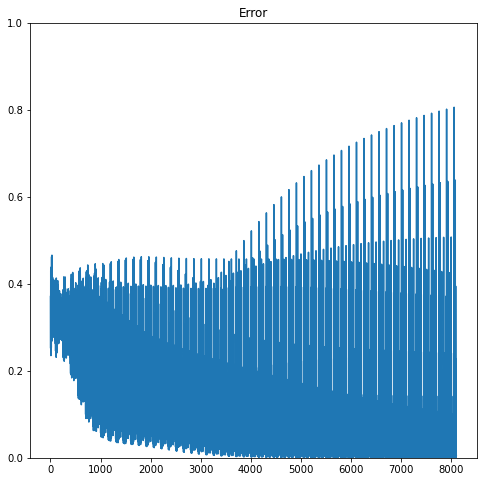

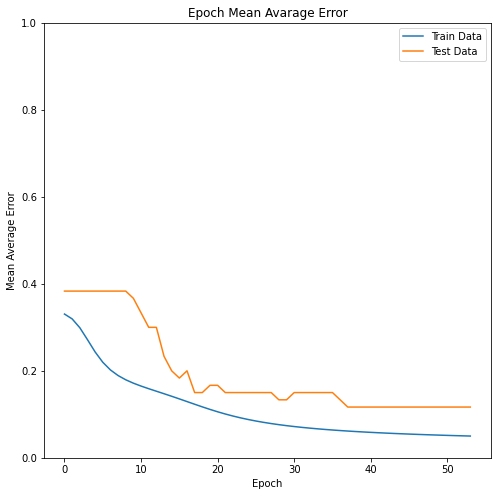

In [32]:
print("Solution reached: "+ str(end))
print("Needed Epochs: " + str(n_epoch))
print("Iterations: " + str(iteration+1))
print_mat("Input Weights:\n",w_input)
print_mat("Hidden Weights:\n",w_hidden)

fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.plot(historic_error,label= "Error")

plt.ylim([0, 1])
plt.title('Error')
plt.show()

fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.plot(historic_epoch_Mean_error,label= "Train Data")
plt.plot(historic_epoch_Mean_error_test_data,label= "Test Data")

plt.legend()
plt.ylim([0, 1])
plt.xlabel("Epoch")
plt.ylabel("Mean Average Error")
plt.title('Epoch Mean Avarage Error')
plt.show()

### Description

We can see that the model achieved an Error less than 0.05 in 54 Epochs.

We can see in the Graph the evolution of the mean average error for each epoch, for the Train and Test DataSet. We can see that the Error for the Test data is Higher than for the Train data, which is expected. So now we can test the model with the Test dataset, and see some of the metrics, like the confusion matrix, or the mean average error:


### Test the Model

In [33]:
historic_predicted_value_test, historic_error_test, confusion_matrix=main_test_program(df_x_test,df_y_test,w_input,w_hidden)

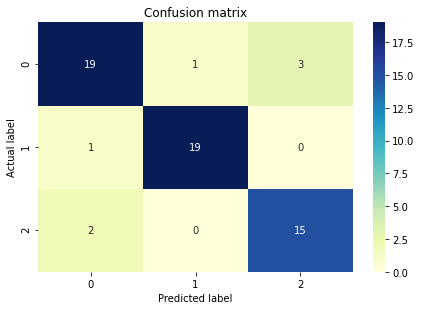

In [34]:
#confusion_matrix
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [35]:

print("Mean Average Error of Test Data: " + str(calculate_Average_Error(historic_error_test)))
# Accuracy
print("Accuracy: ",accuracy(confusion_matrix))
# Precision
print("Precision(0): ",precision(confusion_matrix,0))
print("Precision(1): ",precision(confusion_matrix,1))
print("Precision(2): ",precision(confusion_matrix,2))
# Recall
print("Recall(0): ",recall(confusion_matrix,0))
print("Recall(1): ",recall(confusion_matrix,1))
print("Recall(2): ",recall(confusion_matrix,2))

Mean Average Error of Test Data: 0.11666666666666667
Accuracy:  0.8833333333333333
Precision(0):  0.8636363636363636
Precision(1):  0.95
Precision(2):  0.8333333333333334
Recall(0):  0.8260869565217391
Recall(1):  0.95
Recall(2):  0.8823529411764706


### Conclusion

We can see above the confusion Matrix, as well as the Mean Average Error for the Train Data. We can see that the model is capable to predict most of the Points, except for 7 points that were misclassified by the model.

It looks like it has most of the problems with the first class, As it classified 1 point as class 1 and 3 points as class 2 when they were class 0. It also classified 1 point from class 1 and 2 points from class 2 as class 0. 

But the overall accuracy of the model is Pretty high, at 0.88. We can also see some other metrics, like the Precision, or the Recall. The overall performance of the model is really high.


# Change the Learning Rate

Now we can check for other learning rate, and see if the model is better or worse:

#### First lets increasy it from 0.2 to 0.5

In [36]:
alpha=0.5 # Learning Rate
epoch=5000 # Number of Epochs
error_threshold=0.05 # Error Threshold for Stop Strategy
n=150 # Number of Error Used for the Mean for the Stop Threshold
check_Test_flag=True # Flag used to check the Test data after each epoch, and save result (True: Check | False: Dont Check)
df_x_test=df_x_test # Test Data, Needed if check_Test_flag=True
df_y_test=df_y_test # Test Data, Needed if check_Test_flag=True


end_Hlr, w_input_Hlr, w_hidden_Hlr, n_epoch_Hlr, iteration_Hlr, historic_error_Hlr, historic_epoch_Mean_error_Hlr, historic_epoch_Mean_error_test_data_Hlr = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
End of the program, the Error threshold has been achieved


In [37]:
print("Solution reached: "+ str(end_Hlr))
print("Needed Epochs: " + str(n_epoch_Hlr))
print("Iterations: " + str(iteration_Hlr+1))
print_mat("Input Weights:\n",w_input_Hlr)
print_mat("Hidden Weights:\n",w_hidden_Hlr)


Solution reached: True
Needed Epochs: 23
Iterations: 3508
Input Weights:
	 [-1.6199575342288903, 1.1143281429994638, 0.8948012928438024, -2.561730958436839, -2.906449438316104, -1.9320889232834195, -1.1027372840844938]
	 [-0.017351661695834082, 0.8771734296086771, 0.16613758759677943, -2.392331740523457, -3.0573394866983317, -1.5281628107492178, -0.30617416119265883]
	 [2.540876559874238, -0.833744306571167, -1.2658528619777405, -1.7098601445256418, -1.0510763758639328, -1.0662880716140548, 0.9211952020353462]
	 [0.23996422638458614, 0.5857377852066042, 0.14097988263994043, -1.9004810327608515, -2.1145852029468766, -1.076547907127847, -0.4611309859954714]
	 [-0.9203318201540431, 1.1459978863143827, 0.2488929008665003, -3.171902589521471, -2.981634957192703, -1.6508313588772565, -0.9780669937179184]
	 [-1.9826762622030807, -2.5348049501341667, -0.2338312190904529, 2.2309942832996157, 2.311846528768263, 0.8392650406668144, -1.085811774675096]
	 [-4.52690830137674, -0.7165711365848276, 1.

#### Now lets try the learning rate at 0.05

In [38]:
alpha=0.05 # Learning Rate
epoch=5000 # Number of Epochs
error_threshold=0.05 # Error Threshold for Stop Strategy
n=150 # Number of Error Used for the Mean for the Stop Threshold
check_Test_flag=True # Flag used to check the Test data after each epoch, and save result (True: Check | False: Dont Check)
df_x_test=df_x_test # Test Data, Needed if check_Test_flag=True
df_y_test=df_y_test # Test Data, Needed if check_Test_flag=True


end_Llr, w_input_Llr, w_hidden_Llr, n_epoch_Llr, iteration_Llr, historic_error_Llr, historic_epoch_Mean_error_Llr, historic_epoch_Mean_error_test_data_Llr = main_train_program( df_x_train, df_y_train, 
                                                                                                                                                alpha=alpha,
                                                                                                                                                epoch=epoch,
                                                                                                                                                error_threshold=error_threshold,
                                                                                                                                                number_error=n,
                                                                                                                                                check_Test_flag=True,
                                                                                                                                                df_x_test=df_x_test, 
                                                                                                                                                df_y_test=df_y_test)

Epoch: 0
Iter: 0
Epoch: 25
Iter: 5000
Epoch: 50
Iter: 10000
Epoch: 75
Epoch: 100
Iter: 15000
Epoch: 125
Iter: 20000
Epoch: 150
Iter: 25000
Epoch: 175
End of the program, the Error threshold has been achieved


In [39]:
print("Solution reached: "+ str(end_Llr))
print("Needed Epochs: " + str(n_epoch_Llr))
print("Iterations: " + str(iteration_Llr+1))
print_mat("Input Weights:\n",w_input_Llr)
print_mat("Hidden Weights:\n",w_hidden_Llr)

Solution reached: True
Needed Epochs: 198
Iterations: 29758
Input Weights:
	 [-1.763620870733249, 0.6123425314565216, 0.3679575311432543, -3.588547632849974, 0.6701793731292506, 0.4999597771785234, -2.2812224723301484]
	 [-1.7294222719555163, -0.17264735288407954, 0.5469441411955448, -3.6909672931586868, 0.6889658250368729, 0.34268695425670814, -1.4893120038339795]
	 [0.6658936325464934, 0.6512654791330529, 0.09429105000117209, -3.124674401247436, 0.03943284249848703, -0.2857099214858213, 1.892472275299148]
	 [-0.7927695181431024, -0.0748502108900661, 0.41811893219275076, -2.963765408041006, 0.10739225951380311, 0.6444744747264001, -0.6304126610293062]
	 [-1.1035909903250145, 0.6083630318489932, 0.06073034351592141, -3.329685916197245, 0.8593190704025471, -0.05439775295021019, -1.3025528319101178]
	 [-0.8225389572596058, 0.022457712079418476, -0.5761220369193826, 3.3396070041024557, -0.45725247455910073, 0.20686444601447176, -0.446785670497305]
	 [-1.5440417138569877, 0.376235802028073

# Now lets compare them

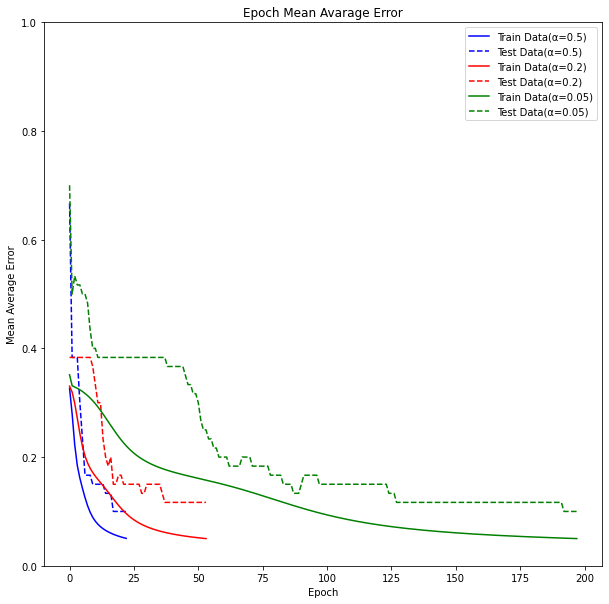

In [40]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)


plt.plot(historic_epoch_Mean_error_Hlr, color='b', label= "Train Data(α=0.5)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_Hlr, color='b', label= "Test Data(α=0.5)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error, color='r', label= "Train Data(α=0.2)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data, color='r', label= "Test Data(α=0.2)", linestyle='dashed')

plt.plot(historic_epoch_Mean_error_Llr, color='g', label= "Train Data(α=0.05)", linestyle='solid')
plt.plot(historic_epoch_Mean_error_test_data_Llr, color='g', label= "Test Data(α=0.05)", linestyle='dashed')

plt.legend()
plt.ylim([0, 1])
plt.xlabel("Epoch")
plt.ylabel("Mean Average Error")
plt.title('Epoch Mean Avarage Error')
plt.show()

# Comments

As we can see from the graph and from previous outputs, we can see that the Learning rate of 0.5 reach faster the desire Threshold, it took 23 epochs, while the 0.2 α, took 54 epochs. And the learning rate of 0.05 was the slowest, it took 198 epochs to reach the target. This is the normal behaviour, as a slower learning rate means that the change in the weights is smaller, meaning it takes longer to update.

Now we let’s see the performance of these model on the Training data:

In [41]:
# Test Data
# α=0.5
historic_predicted_value_test_Hlr, historic_error_test_Hlr, confusion_matrix_Hlr=main_test_program(df_x_test,df_y_test,w_input_Hlr,w_hidden_Hlr)
# α=0.05
historic_predicted_value_test_Llr, historic_error_test_Llr, confusion_matrix_Llr=main_test_program(df_x_test,df_y_test,w_input_Llr,w_hidden_Llr)

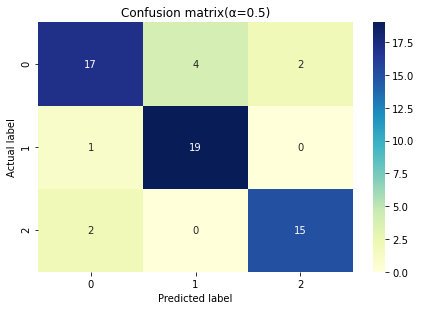

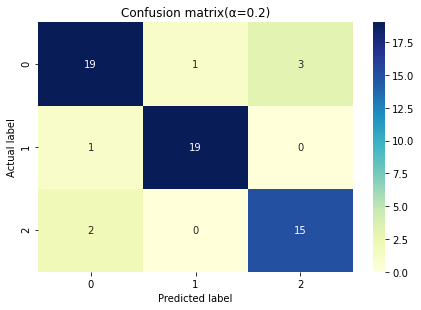

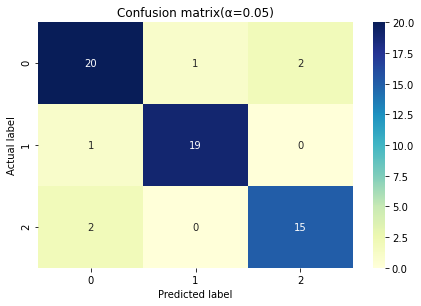

###### High Learning Rate (α=0.5) ######
Mean Average Error of Test Data: 0.15
Accuracy:  0.85
		Precision		Recall
	0:  0.85	   0.7391304347826086
	1:  0.8260869565217391		   0.95
	2:  0.8823529411764706	   0.8823529411764706

###### Normal Learning Rate (α=0.2) ######
Mean Average Error of Test Data: 0.11666666666666667
Accuracy:  0.8833333333333333
		Precision		Recall
	0:  0.8636363636363636	   0.8260869565217391
	1:  0.95		   0.95
	2:  0.8333333333333334	   0.8823529411764706

###### Low Learning Rate (α=0.05) ######
Mean Average Error of Test Data: 0.1
Accuracy:  0.9
		Precision		Recall
	0:  0.8695652173913043	   0.8695652173913043
	1:  0.95		   0.95
	2:  0.8823529411764706	   0.8823529411764706


In [42]:
#confusion_matrix
fig, ax = plt.subplots()
# create heatmap

# High Learning Rate (α=0.5)
sns.heatmap(pd.DataFrame(confusion_matrix_Hlr), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix(α=0.5)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Normal Learning Rate (α=0.2)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix(α=0.2)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Low Learning Rate (α=0.05)
sns.heatmap(pd.DataFrame(confusion_matrix_Llr), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix(α=0.05)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


print("###### High Learning Rate (α=0.5) ######")
print("Mean Average Error of Test Data: " + str(calculate_Average_Error(historic_error_test_Hlr)))
print("Accuracy: ",accuracy(confusion_matrix_Hlr))
print("\t\tPrecision\t\tRecall")
print("\t0:  "+str(precision(confusion_matrix_Hlr,0))+"\t   "+str(recall(confusion_matrix_Hlr,0)))
print("\t1:  "+str(precision(confusion_matrix_Hlr,1))+"\t\t   "+str(recall(confusion_matrix_Hlr,1)))
print("\t2:  "+str(precision(confusion_matrix_Hlr,2))+"\t   "+str(recall(confusion_matrix_Hlr,2)))
print()

print("###### Normal Learning Rate (α=0.2) ######")
print("Mean Average Error of Test Data: " + str(calculate_Average_Error(historic_error_test)))
print("Accuracy: ",accuracy(confusion_matrix))
print("\t\tPrecision\t\tRecall")
print("\t0:  "+str(precision(confusion_matrix,0))+"\t   "+str(recall(confusion_matrix,0)))
print("\t1:  "+str(precision(confusion_matrix,1))+"\t\t   "+str(recall(confusion_matrix,1)))
print("\t2:  "+str(precision(confusion_matrix,2))+"\t   "+str(recall(confusion_matrix,2)))
print()

print("###### Low Learning Rate (α=0.05) ######")
print("Mean Average Error of Test Data: " + str(calculate_Average_Error(historic_error_test_Llr)))
print("Accuracy: ",accuracy(confusion_matrix_Llr))
print("\t\tPrecision\t\tRecall")
print("\t0:  "+str(precision(confusion_matrix_Llr,0))+"\t   "+str(recall(confusion_matrix_Llr,0)))
print("\t1:  "+str(precision(confusion_matrix_Llr,1))+"\t\t   "+str(recall(confusion_matrix_Llr,1)))
print("\t2:  "+str(precision(confusion_matrix_Llr,2))+"\t   "+str(recall(confusion_matrix_Llr,2)))

# Final

We can see that the Model with the Highest accuracy is the Low Learning Rate (α=0.05), follow by the Normal Learning Rate (α=0.2) and lastly the High Learning Rate (α=0.5) with an accuracy of 0.9, 0.88, 0.85 respectively.

We can also appreciate that the Low Learning Rate (α=0.05) is better that the others. And in turn we can also see that the Lower the learning rate is, the better the model becomes. But the longer it takes.

The Low Learning Rate (α=0.05) model achieve 0.9 accuracy taking almost 200 epochs, while the Normal Learning Rate (α=0.2) got 0.8833 accuracy while taking 54 epochs. Soo the Low Learning Rate (α=0.05) model was marginally better (It classify correctly just 1 more datapoint) but it took almost 4 times longer to train. 

If we compare it with the High Learning Rate (α=0.5) model, it took almost 9 times longer to train (198 to 23 epochs) but achieve a 0.1 higher accuracy (0.85 to 0.95 accuracy) 


So, the best model in terms of accuracy is the (α=0.05), but it also the slowest. 
The fastest model to train es the (α=0.5), but also the more imprecise
